Epoch 1/3


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 162s 401ms/step - accuracy: 0.6947 - loss: 0.5577 - val_accuracy: 0.8387 - val_loss: 0.3694
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 147s 376ms/step - accuracy: 0.8663 - loss: 0.3279 - val_accuracy: 0.8262 - val_loss: 0.4161
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 149s 380ms/step - accuracy: 0.8892 - loss: 0.2781 - val_accuracy: 0.8290 - val_loss: 0.3834
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step


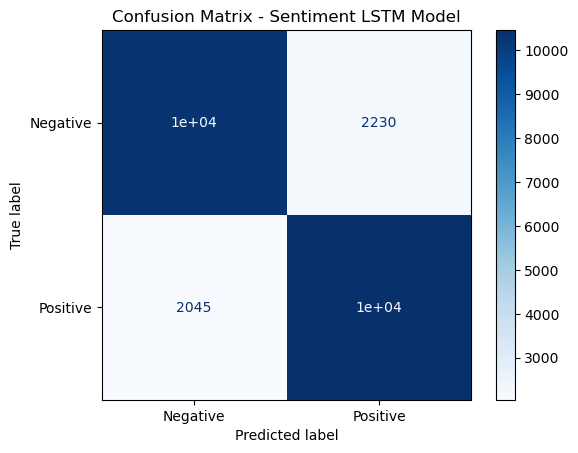

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Review Text:
 you believe that any given war movie can make you really feel the war you need to see called the ? are flying in english it tells the story of ? ? and boris who are in love on the verge of wwii they are walking along the ? watching the ? fly by when the war starts boris is promptly sent off to war ? hides out with a family and ends up marrying the son whom she does not love boris meanwhile continues ? through the countryside fighting the nazis and experiencing all the horrors of war until he he runs out of energy when ? working in a military hospital receives this news she refuses to accept it until ? body arrives home on one of the trains simultaneously the radio ? that germany has ? and the allied powers have won the war the soviet union lost 27 million citizens but it's the start of a new era br br this movie did a very good job showing the human impact of the war not only in the battlefield but also how it affected the 

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
 
# Load IMDB dataset (only top 10,000 words to keep it simple)
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
 
# Pad sequences to the same length
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
 
model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')  # Binary sentiment (positive or negative)
])
 
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# Train model
model.fit(x_train, y_train, batch_size=64, epochs=3, validation_data=(x_test, y_test))
 

 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
 
# Predict on test data
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int32")
 
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Sentiment LSTM Model")
plt.show()
 

 

word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}
 
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])
 
# Example review
sample_index = 123
print("Review Text:\n", decode_review(x_test[sample_index]))
print("Predicted Sentiment:", "Positive" if y_pred[sample_index] else "Negative")
print("Actual Sentiment:", "Positive" if y_test[sample_index] else "Negative")
 